<a href="https://colab.research.google.com/github/edenlum/projecteuler/blob/main/Subsets_with_a_Unique_Sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://projecteuler.net/problem=201

To solve this, we will use dynamic programming.

We will count for each possible sum how many times it occurs. s(100, 50) returns a dictionary that for each possible sums stores the count.

Consider a set of N elements and we need to pick subsets of size K. We can split the subsets into subsets with the last element and without. Counting how many times a sum occurs in subsets with the last element is done by taking s(n-1, k-1) and adding the last element to each item's key in the dictionary (If the last item is x, and we can create s m times by summing a subset of size k-1 of the n-1 first elements, then we can also create s+x m times).

Connting how many times a sum occurs in subsets without the last element is done by calling s(n-1, k).

The base case is:
- k=0 (we can only sum to 0 1 time)
- k=1 (we can sum every element 1 times)

In [86]:
SET = [i*i for i in range(1, 101)]

# takes too long
@lru_cache(maxsize=None)  # Set maxsize to None for unlimited cache size
def s(n, k):
    if k==0:
        return
    if k==1:
        return {i: 1 for i in SET}
    if k==n:
        return {sum(SET): 1}
    # without last element
    sum_count = s(n-1, k)
    # with last element
    x = SET[n-1]
    for subset_sum, count in s(n-1, k-1).items():
        sum_count[subset_sum + x] = sum_count.get(subset_sum + x, 0) + count
    return sum_count

Let's try a dynamic approach instead of recursion.

Notice we either call (n-1, k) or (n-1, k-1). We have the base case of (n=k and k=1). We want to keep the results in memory by using a 3d array for n,k and the sum (keeping the counts).

The naive approach of saving array of shape (n, k, max) takes too much memory, so instead we will use a rolling array approach. We calculate the elements row by row anyway, starting from k=1 and and n=k+1. We only need to go up to n=k+K (up to (50,1) for example). Each row uses only the previous row.

In [2]:
# import numpy as np

# naive approach
# def solve_dynamic(n, k):
#     s = np.full((n+1, k+1, sum([i*i for i in range(k+1, n+1)])+1), 0)
#     # base case k=0
#     s[:, 0, 0] = 1
#     # base case n=k
#     for j in range(1, k+1):
#         s[j, j, sum([i*i for i in range(1, j+1)])] = 1
#     for j in range(1, k+1):
#         for i in range(j+1, n+1):
#             s[i, j] = s[i-1, j]
#             s[i, j, i*i:] += s[i-1, j-1, :-i*i]

#     return s[n, k]

In [21]:
import numpy as np

def solve_dynamic(N, K):
    max_sum = sum(i*i for i in range(K+1, N+1)) + 1
    # starting row is k=0
    previous = np.zeros((N+1, max_sum), dtype=int)
    previous[:, 0] = 1

    for k in range(1, K+1):
        current = np.zeros((N+1, max_sum), dtype=int)
        # base case n=k
        current[k, sum(i*i for i in range(1, k+1))] = 1
        for n in range(k+1, k+K+1):
            current[n] = current[n-1]
            current[n, n*n:] += previous[n-1, :-n*n]
        previous = current

    return current[N]


In [22]:
import time
t = time.time()
print(np.where(solve_dynamic(100, 50) == 1)[0].sum())
print(time.time()-t)

115039000
6.138242721557617


Some early plotting and testing to get ideas

In [25]:
n=10
s = [i*i for i in range(1, n+1)]
s

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

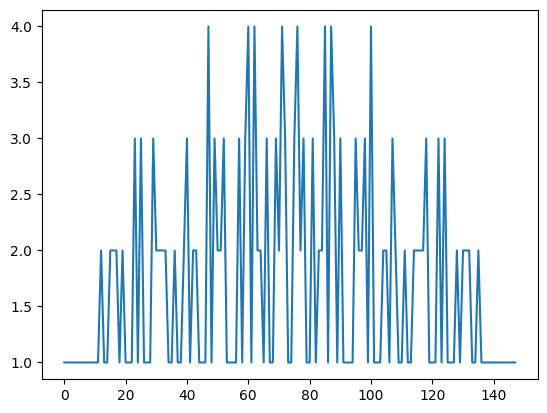

In [26]:
import itertools

sum_count = {}
for comb in itertools.combinations(s, n//2):
    sum_count[sum(comb)] = sum_count.get(sum(comb), 0) + 1
sum_count = sorted(sum_count.items())

from matplotlib import pyplot as plt
plt.plot([i for i, x in enumerate(sum_count)], [v for k, v in sum_count])

In [27]:
unique_sums = [k for k, v in sum_count if v == 1]
(sorted(unique_sums))

[55,
 66,
 75,
 79,
 82,
 87,
 88,
 90,
 94,
 95,
 99,
 100,
 106,
 110,
 118,
 121,
 123,
 126,
 129,
 131,
 132,
 134,
 144,
 145,
 147,
 148,
 152,
 156,
 157,
 158,
 160,
 167,
 168,
 169,
 170,
 172,
 176,
 181,
 184,
 185,
 192,
 193,
 200,
 201,
 204,
 209,
 213,
 215,
 216,
 217,
 218,
 225,
 227,
 228,
 229,
 233,
 237,
 238,
 240,
 241,
 251,
 253,
 254,
 256,
 259,
 262,
 264,
 267,
 275,
 279,
 285,
 286,
 290,
 291,
 295,
 297,
 298,
 303,
 306,
 310,
 319,
 330]

In [ ]:
def sum_unique_combinations(n):
    s = [i*i for i in range(1, n+1)]
    sum_count = {}
    for comb in itertools.combinations(s, n//2):
        sum_count[sum(comb)] = sum_count.get(sum(comb), 0) + 1

    unique_sums = [k for k, v in sum_count.items() if v == 1]
    return sum(unique_sums)

for i in range(100):
    print(i, sum_unique_combinations(i))

0 0
1 0
2 5
3 14
4 90
5 220
6 910
7 1976
8 5100
9 8336
10 15785
11 22331
12 31850
13 40925
14 49735
15 58848
16 74800
17 86011
18 107559
19 123964
20 152110
21 181504
22 220110
23 293366
24 357700
25 393982
26 458874
